# 网络社团划分
### GN benchmark

GN模型是常用的含有社团结构的网络模型。给定网络的节点数N，社团数C，社团内的平均连接度zin，社团间的平均连接度zout。

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as  plt
N = 128  # 网络规模
C = 4    # 社团数量
zin = 14 #社团内的连边数
zout = 2 #社团间的连边数


n = int(N/C) # 每个社团的节点数

nodes = []
nall = []
for a in ['a','b','c','d']:
    xx = []
    for i in range(n):
        xx.append(a+str(i))
    nodes += xx
    nall.append(xx)

pin = 1.0*zin/(n-1)/2
pout = 1.0*zout/(3*n-1)/2

g = nx.Graph()

for nc in nall:
    for i in nc:
        for j in nc:#社团内连边
            if i==j:
                continue
            p = random.random()
            if p<pin:
                g.add_edge(i,j)
        for j in set(nodes)-set(nc):#外部连边
            p = random.random()
            if p<pout:
                g.add_edge(i,j)

In [3]:
pos=nx.layout.spring_layout(g)

In [4]:
colors={"a":"r",'b':"b","c":"green","d":"grey"}
node_color = {i:colors[i[0]] for i in  nodes}

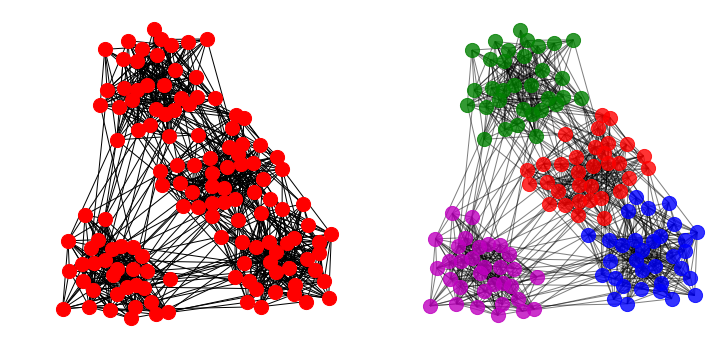

In [5]:
fig,ax=plt.subplots(figsize=(12,6),nrows=1,ncols=2)
colors=["r","b",'g','m']
nx.draw(g, pos,ax=ax[0],node_size=200,)
for i in range(len(nall)):
    nx.draw_networkx_nodes(g, pos,ax=ax[1],node_size=200,nodelist=nall[i],node_color=colors[i],alpha=0.8)
nx.draw_networkx_edges(g,pos, ax=ax[1],alpha=0.5)
ax[1].axis('off')
plt.show()

### 利用 laplacian矩阵进行社团划分

1. 计算laplacian矩阵
2. 计算L矩阵的特征值和特征向量($0=\lambda_0 < \lambda_1 < \lambda_2 \dots$)
3. 利用前几大特征值对应的特征向量进行聚类

In [5]:
import numpy as np
lap_g = nx.laplacian_matrix(g) # laplacian matrix of g
eigval,eigvec = np.linalg.eigh(lap_g.todense())


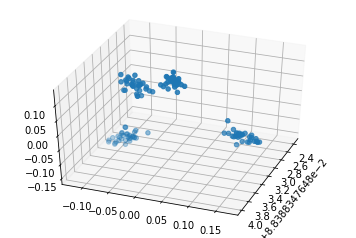

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.view_init(elev=40., azim=21)
ax.scatter(eigvec[:,0],eigvec[:,1],eigvec[:,2],'o')

# 利用模块度优化算法进行社团划分
利用提供的python-louvain https://github.com/taynaud/python-louvain/ 进行社团划分

In [6]:
import community
partition = community.best_partition(g)

In [7]:
partition

{'a0': 0,
 'a6': 0,
 'a10': 0,
 'a16': 0,
 'a17': 0,
 'a21': 0,
 'a24': 0,
 'a27': 0,
 'a31': 0,
 'c31': 1,
 'a1': 0,
 'a2': 0,
 'a3': 0,
 'a9': 0,
 'a12': 0,
 'a14': 0,
 'a22': 0,
 'a23': 0,
 'a26': 0,
 'a8': 0,
 'a25': 0,
 'a29': 0,
 'b16': 2,
 'c6': 1,
 'a7': 0,
 'a11': 0,
 'a15': 0,
 'a28': 0,
 'd3': 3,
 'a4': 0,
 'a13': 0,
 'a18': 0,
 'a30': 0,
 'd1': 3,
 'a5': 0,
 'b21': 2,
 'b29': 2,
 'b9': 2,
 'a19': 0,
 'c3': 1,
 'd16': 3,
 'b8': 2,
 'b15': 2,
 'c28': 1,
 'b22': 2,
 'b28': 2,
 'd29': 3,
 'c16': 1,
 'c5': 1,
 'd4': 3,
 'b0': 2,
 'b17': 2,
 'd20': 3,
 'b20': 2,
 'd18': 3,
 'c19': 1,
 'c13': 1,
 'a20': 0,
 'c12': 1,
 'c25': 1,
 'b12': 2,
 'c15': 1,
 'b13': 2,
 'd12': 3,
 'b26': 2,
 'c24': 1,
 'c23': 1,
 'c30': 1,
 'd2': 3,
 'c20': 1,
 'd5': 3,
 'b6': 2,
 'b18': 2,
 'b24': 2,
 'b1': 2,
 'b4': 2,
 'b7': 2,
 'b10': 2,
 'b19': 2,
 'b23': 2,
 'b30': 2,
 'd15': 3,
 'b2': 2,
 'b5': 2,
 'b31': 2,
 'd13': 3,
 'b3': 2,
 'b14': 2,
 'b25': 2,
 'b27': 2,
 'd6': 3,
 'b11': 2,
 'c9': 1,
 'd21':

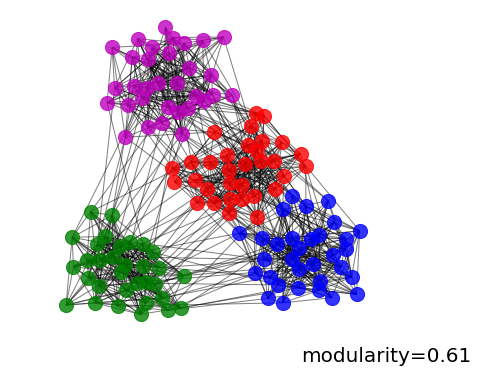

In [8]:
plt.figure(figsize=(6,6))
colors=["r",'m','b',"g",]
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 200,
                                node_color = colors[com],alpha=0.8)


nx.draw_networkx_edges(g,pos, alpha=0.5)
plt.axis('off')
q=community.modularity(partition,g)
plt.text(0.5,-1,"modularity=%.2f"%q,fontsize=20)
plt.show()

### 网络动力学
疾病传播的SIR模型

S状态的节点以概率ββ被处于I状态的邻居感染，I状态的节点以概率γγ恢复为R状态节点。


In [52]:
def suspect_infect_recovery(G, sources, beta, gamma, T=np.inf):
    state = {i:'S' for i in G}
    for s in sources:
        state[s] = 'I'
    if T==np.inf:
        dt = 0
    else:
        dt = 1
    iterator = 0
    flag = False
    while iterator < T:
        iterator += dt
        if flag:
            return state
        flag = True
        state_temp = state.copy()
        for i in G:
            if state[i] == 'S':
                nbs = sum([1 for j in G.neighbors(i) if state[j]=="I"])
                if nbs == 0:
                    continue
                if random.random() < (1 - (1-beta)**nbs):
                    state_temp[i] = 'I'
            elif state[i] == 'I':
                flag = False
                if random.random() < gamma:
                    state_temp[i] = 'R'
        state = state_temp.copy()
    return state

In [56]:
beta = 0.3#感染概率
gamma = 1#恢复概率
g = nx.karate_club_graph()

state = suspect_infect_recovery(g,[1],beta,gamma)
print('各个节点的状态: ',state)0
print('总感染数: ',sum([1 for i in state if state[i]!='S']))

各个节点的状态:  {0: 'R', 1: 'R', 2: 'R', 3: 'R', 4: 'S', 5: 'S', 6: 'S', 7: 'R', 8: 'R', 9: 'R', 10: 'S', 11: 'R', 12: 'R', 13: 'R', 14: 'R', 15: 'R', 16: 'S', 17: 'R', 18: 'R', 19: 'R', 20: 'R', 21: 'R', 22: 'S', 23: 'R', 24: 'R', 25: 'S', 26: 'S', 27: 'R', 28: 'R', 29: 'R', 30: 'R', 31: 'R', 32: 'R', 33: 'R'}
总感染数:  26


In [97]:
pos=nx.layout.spring_layout(g)

Text(1.03,0.7,'suspect')

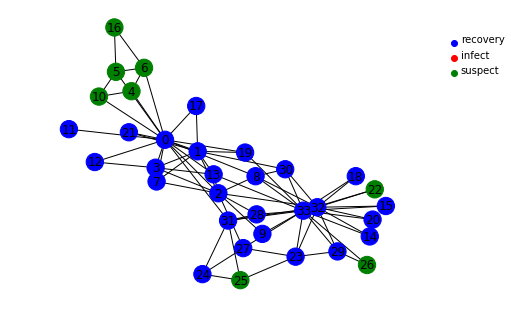

In [99]:

colors={'R':'b','I':'r','S':'g'}
color=[colors[state[u]] for u in g]
nx.draw(g,pos=pos,node_color=color,with_labels=True,node_size=300)

plt.scatter(1,0.9,c='b')
plt.text(1.03,0.9,"recovery")

plt.scatter(1,0.8,c='r')
plt.text(1.03,0.8,"infect")

plt.scatter(1,0.7,c='g')
plt.text(1.03,0.7,"suspect")

# 利用SIR模型计算节点重要性

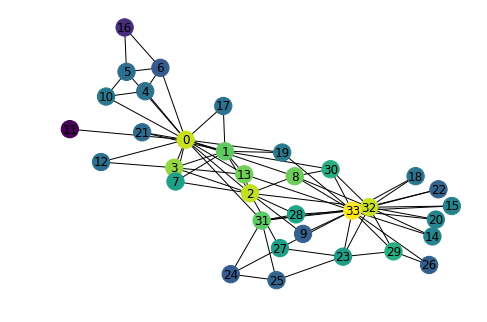

In [111]:
res=[[] for i in g]
for _ in range(100):
    for i in g:
        state = suspect_infect_recovery(g,[i],beta,gamma)
        s=sum([1 for i in state if state[i]!='S'])
        res[i].append(s)
impact=[sum(r)/len(r) for r in res]
nx.draw(g,pos=pos,node_color=impact,with_labels=True,node_size=300)

In [136]:
Impact_sort=sorted([(i,g.node[i]['club'],impact[i]) for i in range(len(impact))],key=lambda x:x[2],reverse=True)

In [137]:
Impact_sort

[(33, 'Officer', 17.4),
 (32, 'Officer', 16.42),
 (0, 'Mr. Hi', 16.37),
 (2, 'Mr. Hi', 16.25),
 (3, 'Mr. Hi', 15.4),
 (13, 'Mr. Hi', 14.75),
 (8, 'Mr. Hi', 14.61),
 (1, 'Mr. Hi', 14.37),
 (31, 'Officer', 14.27),
 (29, 'Officer', 12.83),
 (30, 'Officer', 12.71),
 (28, 'Officer', 12.19),
 (7, 'Mr. Hi', 11.97),
 (27, 'Officer', 11.89),
 (23, 'Officer', 11.85),
 (20, 'Officer', 10.66),
 (15, 'Officer', 10.62),
 (14, 'Officer', 10.6),
 (19, 'Mr. Hi', 10.1),
 (10, 'Mr. Hi', 10.05),
 (18, 'Officer', 9.85),
 (4, 'Mr. Hi', 9.63),
 (17, 'Mr. Hi', 9.63),
 (12, 'Mr. Hi', 9.52),
 (5, 'Mr. Hi', 9.47),
 (21, 'Mr. Hi', 9.31),
 (25, 'Officer', 9.04),
 (22, 'Officer', 8.89),
 (9, 'Officer', 8.84),
 (26, 'Officer', 8.76),
 (24, 'Officer', 8.66),
 (6, 'Mr. Hi', 8.59),
 (16, 'Mr. Hi', 6.59),
 (11, 'Mr. Hi', 5.04)]